In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }
# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

### Notes from viz lectures

### Simplification
* Figure out consolidation schemes--ratios might be useful for rxtr params
* Exclude or dim unimportant data

### Headings for training set viz
* Goal for i.i.d. training set accomplished / not accomplished
* Certain locations in training set space difficult to predict OR error higher in certain locations in training set space
* Natural uranium not reliably predicted by any algorithm
* Complex models predict x parameters better than simple models (or vice versa)

# Scoring Visualizations

In [9]:
rxtr_scr1 = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr1 = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr1 = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr1 = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

In [ ]:
rxtr_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr2 = pd.read_csv('../results/19jul2018/trainset_2_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

In [ ]:
rxtr_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_reactor_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
burn_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_burnup_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
enri_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_enrichment_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})
cool_scr3 = pd.read_csv('../results/22jul2018/trainset_3_fissact_cooling_scores.csv').rename(columns = {'Unnamed: 0':'CV_fold'})

### Variance

In [10]:
var = 'test_explained_variance'
acc = 'test_accuracy'
alg = 'algorithm'
Alg = 'Algorithm'

In [11]:
burn1 = burn_scr1.filter(items = [Alg, var])
cool1 = cool_scr1.filter(items = [Alg, var])
enri1 = enri_scr1.filter(items = [Alg, var])
rxtr1 = rxtr_scr1.filter(items = [Alg, acc])

#burn2 = burn_scr2.filter(items = [alg, var])
#cool2 = cool_scr2.filter(items = [alg, var])
#enri2 = enri_scr2.filter(items = [alg, var])
#rxtr2 = rxtr_scr2.filter(items = [alg, acc])

#burn3 = burn_scr3.filter(items = [Alg, var])
#cool3 = cool_scr3.filter(items = [Alg, var])
#enri3 = enri_scr3.filter(items = [Alg, var])
#rxtr3 = rxtr_scr3.filter(items = [Alg, acc])

burn1['Score'] = burn1[var]
cool1['Score'] = cool1[var]
enri1['Score'] = enri1[var]
rxtr1['Score'] = rxtr1[acc]

#burn2['Score'] = burn2[var]
#cool2['Score'] = cool2[var]
#enri2['Score'] = enri2[var]
#rxtr2['Score'] = rxtr2[acc]

#burn3['Score'] = burn3[var]
#cool3['Score'] = cool3[var]
#enri3['Score'] = enri3[var]
#rxtr3['Score'] = rxtr3[acc]

In [12]:
rxtr1.head()

,Algorithm,test_accuracy,Score
0,knn,0.967417,0.967417
1,knn,0.964382,0.964382
2,knn,0.969076,0.969076
3,knn,0.966387,0.966387
4,knn,0.965703,0.965703


In [13]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn1['Parameter'] = 'Burnup [MWd/MTU]'
enri1['Parameter'] = 'Enrichment [% U235]'
cool1['Parameter'] = 'Cooling Time [Days]'
rxtr1['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn1, enri1, cool1, rxtr1])

scr

,Algorithm,Parameter,Score,test_accuracy,test_explained_variance
0,knn,Burnup [MWd/MTU],0.990851,NaN,0.990851
1,knn,Burnup [MWd/MTU],0.992350,NaN,0.992350
2,knn,Burnup [MWd/MTU],0.991078,NaN,0.991078
3,knn,Burnup [MWd/MTU],0.991712,NaN,0.991712
4,knn,Burnup [MWd/MTU],0.993553,NaN,0.993553
5,dtree,Burnup [MWd/MTU],0.994582,NaN,0.994582
6,dtree,Burnup [MWd/MTU],0.993154,NaN,0.993154
7,dtree,Burnup [MWd/MTU],0.992699,NaN,0.992699
8,dtree,Burnup [MWd/MTU],0.992929,NaN,0.992929
9,dtree,Burnup [MWd/MTU],0.993709,NaN,0.993709


In [49]:
plt.clf()

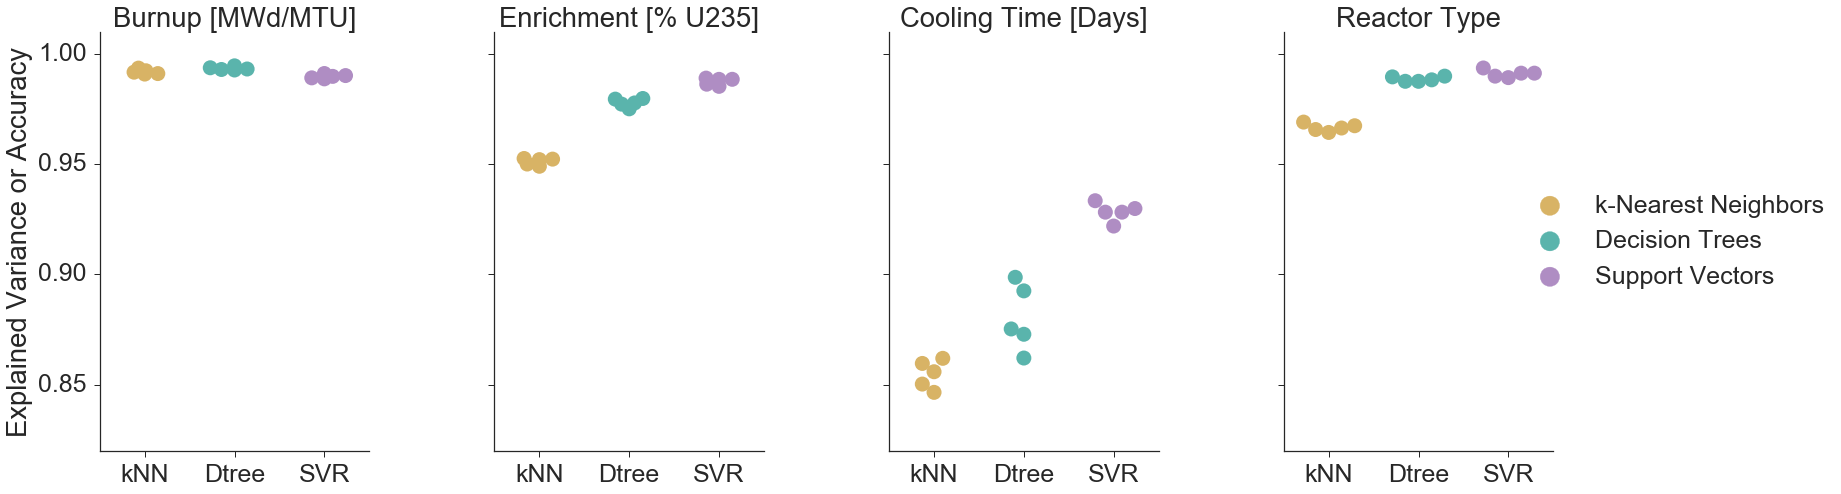

In [50]:
var = sns.factorplot(x=Alg, y="Score",
                     hue=Alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, 
                     aspect=.7)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(['kNN', 'Dtree', 'SVR'])
    .set_titles("{col_name}")
    .set(ylim=(0.82, 1.01)))
leg = plt.legend(loc='center', bbox_to_anchor=(1.45, 0.5), markerscale=2.5)
new_labels = ['k-Nearest Neighbors', 'Decision Trees', 'Support Vectors']
for t, l in zip(leg.texts, new_labels): 
    t.set_text(l)
var.savefig('../results/4oct2018/graphs/scores.png', bbox_inches='tight', transparent=True)

In [ ]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn2['Parameter'] = 'Burnup [MWd/MTU]'
enri2['Parameter'] = 'Enrichment [% U235]'
cool2['Parameter'] = 'Cooling Time [Days]'
rxtr2['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn2, enri2, cool2, rxtr2])

var = sns.factorplot(x=alg, y="Score",
                     hue=alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.8, 1.03))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/22jul2018/graphs/2variance.png', bbox_inches='tight', transparent=True)

In [ ]:
plt.clf()
sns.set(style="ticks", font_scale=2.5)

burn3['Parameter'] = 'Burnup [MWd/MTU]'
enri3['Parameter'] = 'Enrichment [% U235]'
cool3['Parameter'] = 'Cooling Time [Days]'
rxtr3['Parameter'] = 'Reactor Type'

scr = pd.DataFrame()
scr = pd.concat([burn3, enri3, cool3, rxtr3])

var = sns.factorplot(x=Alg, y="Score",
                     hue=Alg, col="Parameter",
                     s=15, legend=False, ci=95, 
                     palette=sns.color_palette(med), 
                     data=scr, kind="swarm", size=8, aspect=.65)

(var.set_axis_labels("", "Explained Variance or Accuracy")
    .set_xticklabels(["kNN", "RR", "SVR"])
    .set_titles("{col_name}")
    .set(ylim=(0.2, 1.03))
    .add_legend(markerscale=2.5))
new_labels = ['kNN', 'RR', 'SVR']
for t, l in zip(var._legend.texts, new_labels): t.set_text(l)
var.savefig('../results/22jul2018/graphs/3variance.png', bbox_inches='tight', transparent=True)